In [157]:
# 필요한 패키지 import
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopandas import GeoDataFrame
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point

In [158]:
# 지리데이터 불러오기
shapefile='C:\DataScience\project\geo_data\gadm36_KOR_1.shp'
gdf=gpd.read_file(shapefile)[['NAME_1','geometry']]
gdf.columns=['시도별','geometry']
gdf
gdf["center"] = gdf["geometry"].centroid

gdf_points = gdf.copy()
gdf_points['city']=['부산', '충북','충남','대구','대전','강원','광주','경기','경북','경남','인천','제주','전북','전남','세종','서울','울산']
gdf_points.set_geometry("center", inplace = True)

C:\Users\ksj14\AppData\Local\Temp/ipykernel_10576/3073927331.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["center"] = gdf["geometry"].centroid


In [159]:
gdf_points

,시도별,geometry,center,city
0,Busan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ...",POINT (129.08145 35.20247),부산
1,Chungcheongbuk-do,"POLYGON ((128.01720 36.20695, 128.01471 36.199...",POINT (127.81822 36.70061),충북
2,Chungcheongnam-do,"MULTIPOLYGON (((126.61459 36.06736, 126.61459 ...",POINT (126.83102 36.52537),충남
3,Daegu,"POLYGON ((128.68794 35.68165, 128.67543 35.671...",POINT (128.57993 35.78117),대구
4,Daejeon,"POLYGON ((127.38995 36.20081, 127.38162 36.204...",POINT (127.37859 36.31868),대전
5,Gangwon-do,"MULTIPOLYGON (((129.32625 37.28597, 129.32625 ...",POINT (128.28101 37.71683),강원
6,Gwangju,"POLYGON ((127.01669 35.10629, 127.01091 35.094...",POINT (126.85513 35.13442),광주
7,Gyeonggi-do,"MULTIPOLYGON (((126.72736 37.01403, 126.72736 ...",POINT (127.18552 37.49071),경기
8,Gyeongsangbuk-do,"MULTIPOLYGON (((129.42291 36.01875, 129.42291 ...",POINT (128.74910 36.31438),경북
9,Gyeongsangnam-do,"MULTIPOLYGON (((128.73097 34.53931, 128.73097 ...",POINT (128.27773 35.29987),경남


In [160]:
# 시도별 진료수(명) 데이터 불러오기
df=pd.read_csv('data/final_mental_pop.csv', encoding='utf-8',index_col=0)
name_list=['Seoul','Busan','Daegu','Incheon','Gwangju','Daejeon','Ulsan','Sejong','Gyeonggi-do','Gangwon-do','Chungcheongbuk-do','Chungcheongnam-do','Jeollabuk-do','Jeollanam-do','Gyeongsangbuk-do','Gyeongsangnam-do','Jeju']
df['시도별']=name_list

# 데이터 합치기
geo= pd.merge(df, gdf, how='outer', on=None)
geo= GeoDataFrame(geo)

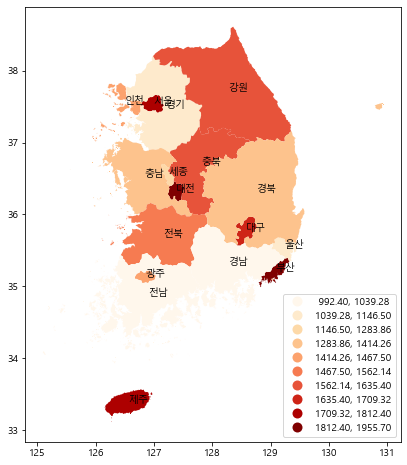

In [165]:
# 지도 그래프 그리기
f, ax = plt.subplots(1, 1, figsize=(16,8),edgecolor='black')

geo_plot=geo.plot(column='진단수(명)', ax=ax, 
               cmap='OrRd',scheme='quantiles',k=10,
               legend=True, legend_kwds={'loc': 'lower right'})
plt.rc('font', family='Malgun Gothic')
texts = []

# 시도별 label 설정
for x, y, label in zip(gdf_points.geometry.x, gdf_points.geometry.y, gdf_points['city']):
     texts.append(plt.text(x, y, label, fontsize = 10))
